# Vérification du transposé du gradient de vitesse dans le tenseur des contraintes visqueuses en 3D – Cas linéaire explicite

In [1]:
from trustutils import run 

run.introduction("D. Jamet")
run.description("On impose un champ de vitesse à divergence nulle particulier dans tout le domaine. On choisit une viscosité variable en espace. Pour ces deux champs, il est possible de déterminer la solution analytique de la force visqueuse. Dans le cas particulier du champ de vitesse considéré, la force visqueuse peut s'écrire sous la forme d'un gradient d'un champ scalaire. Le champ de pression calculé doit donc correspondre à ce champ scalaire.")
run.TRUST_parameters()

## Introduction 
 Validation made by : D. Jamet



 Report generated 25/01/2022

### Description 
On impose un champ de vitesse à divergence nulle particulier dans tout le domaine. On choisit une viscosité variable en espace. Pour ces deux champs, il est possible de déterminer la solution analytique de la force visqueuse. Dans le cas particulier du champ de vitesse considéré, la force visqueuse peut s'écrire sous la forme d'un gradient d'un champ scalaire. Le champ de pression calculé doit donc correspondre à ce champ scalaire.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Grad_U_Transpose_3D_c/build)

In [2]:
from trustutils import run 
import os
c1 = run.addCase(".","grad_u_transpose_partout_3d_explicite.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* ./grad_u_transpose_partout_3d_explicite.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.2s.


## Champ de pression
On vérifie que le champ de pression calculé est bien nul.
### Champs de pression calculé 
Le champ de pression 3D calculé par GENEPI est tracé.

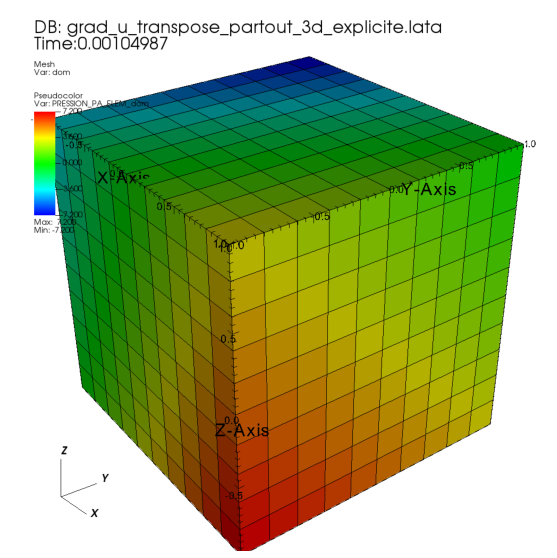

In [3]:
from trustutils import visit

Graphique=visit.Show("./grad_u_transpose_partout_3d_explicite.lata","Pseudocolor","PRESSION_PA_ELEM_dom")
Graphique.normal3D([0.7,-0.5,0.5])
Graphique.up3D([-0.4,0.3,0.9])
Graphique.plot()

### Différence entre champ de pression calculé et champ de pression analytique
Ce champ doit être nul.

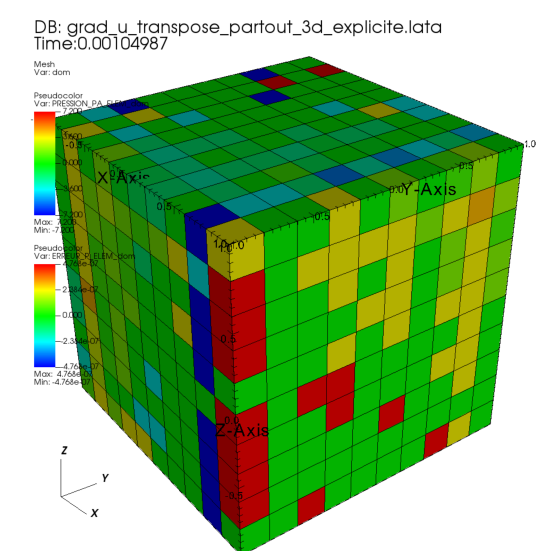

In [4]:
from trustutils import visit

Graphique=visit.Show("./grad_u_transpose_partout_3d_explicite.lata","Pseudocolor","PRESSION_PA_ELEM_dom")
Graphique.normal3D([0.7,-0.5,0.5])
Graphique.up3D([-0.4,0.3,0.9])
Graphique.visitCommand("DefineScalarExpression(\"P_ANALYTIQUE_ELEM_dom\",\"(4.*coord(dom)[0]-2.*coord(dom)[1]-2.*coord(dom)[2])\")")
Graphique.visitCommand("DefineScalarExpression(\"ERREUR_P_ELEM_dom\",\"PRESSION_PA_ELEM_dom-P_ANALYTIQUE_ELEM_dom\")")
Graphique.addField("./grad_u_transpose_partout_3d_explicite.lata","Pseudocolor","ERREUR_P_ELEM_dom")
Graphique.plot()

## Data Files
### grad_u_transpose_3d_explicite

In [5]:
from trustutils import run

run.dumpDataset("./grad_u_transpose_partout_3d_explicite.data")

 # Hydraulique 3D pour tester le grad(u)^T du tenseur visqueux #
 
 dimension 3
 
 Pb_hydraulique pb
 
 Domaine dom
 
 Mailler dom
 {
         Pave Cavite
         {
                 Origine -1. -1. -1.
                 Nombre_de_noeuds 11 11 11
                 Longueurs 2. 2. 2.
         }
         {
                 Bord Gauche   Y = -1.  -1. <= X <= 1.  -1. <= Z <= 1.
                 Bord Droit    Y =  1.  -1. <= X <= 1.  -1. <= Z <= 1.
                 Bord Bas      Z = -1.  -1. <= X <= 1.  -1. <= Y <= 1.
                 Bord Haut     Z =  1.  -1. <= X <= 1.  -1. <= Y <= 1.
                 Bord Derriere X = -1.  -1. <= Y <= 1.  -1. <= Z <= 1.
                 Bord Devant   X =  1.  -1. <= Y <= 1.  -1. <= Z <= 1.
         }
 }
 
 EF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 2.5
 	 dt_impr 5.e-1
 	 dt_sauv 1
 	 seuil_statio 1.e-8
 	 seuil_statio 1.905e-05
 	 dt_min 5e-5
 }
 Fluide_Incompressible eau
 Read eau
 {
 	 mu Champ_Fonc_XYZ dom 1 (10.+x+y+z)
 	 rho